# putting environment canada files together

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path

In [2]:
years = np.arange(1958,2022)
n = len(years)
years = np.repeat(years, 12)

In [3]:
months = np.arange(12)
months = np.tile(months,n)

In [4]:
### note: files downloaded in bulk using the following command line prompt: <br>
# for year in \`seq 1958 2021\`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=888&Year=${year}&Month=${month\}&Day=14&timeframe=2&submit= Download+Data" ;done;done

files = ["/home/rbeutel/courses/442/en_climate_daily_BC_1108446_{}_P1D.csv.{}".format(years[i],months[i]) for i in range(len(months))]

In [5]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1958-01-01,1958,1,1,NaN,7.8,...,0.0,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1958-01-02,1958,1,2,NaN,8.3,...,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1958-01-03,1958,1,3,NaN,9.4,...,0.0,NaN,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1958-01-04,1958,1,4,NaN,9.4,...,0.0,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,1958-01-05,1958,1,5,NaN,8.9,...,0.0,NaN,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280507,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,2021-12-27,2021,12,27,NaN,-5.4,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
280508,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,2021-12-28,2021,12,28,NaN,-0.7,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
280509,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,2021-12-29,2021,12,29,NaN,-2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
280510,-123.12,49.3,VANCOUVER HARBOUR CS,1108446,2021-12-30,2021,12,30,NaN,1.7,...,NaN,NaN,8.6,NaN,NaN,NaN,NaN,M,NaN,M


In [11]:
df.to_csv("VanHarbourWeather.csv",index=False)

# getting biological info from SalishSeaCast

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

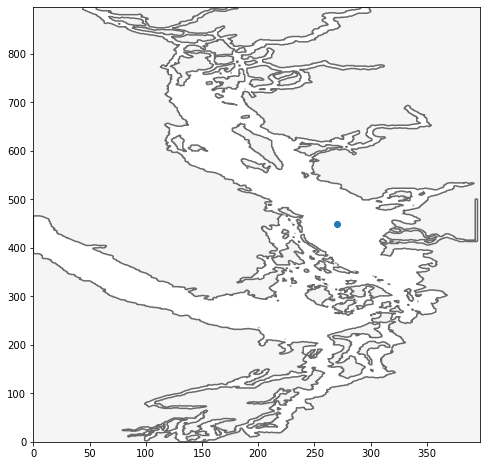

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

# Overlay domain landmask and coastline
ax.contourf(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(mesh.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='dimgray')
ax.scatter(270,450)

In [6]:
y, x = 450, 270
mesh.tmask[0,:,y,x]*mesh.gdept_0[0,:,y,x]
# pick cell 27 down

<xarray.DataArray (z: 40)>
array([  0.5000003,   1.5000031,   2.5000114,   3.5000305,   4.5000706,
         5.5001507,   6.5003104,   7.500623 ,   8.501236 ,   9.502433 ,
        10.5047655,  11.509312 ,  12.518167 ,  13.535412 ,  14.568982 ,
        15.634288 ,  16.761173 ,  18.007135 ,  19.481785 ,  21.389978 ,
        24.100256 ,  28.229916 ,  34.685757 ,  44.517723 ,  58.484333 ,
        76.58559  ,  98.06296  , 121.866516 , 147.08946  , 173.11449  ,
       199.57304  , 226.2603   , 253.06664  , 279.93454  , 306.8342   ,
       327.14487  ,   0.       ,   0.       ,   0.       ,   0.       ],
      dtype=float32)
Dimensions without coordinates: z

In [7]:
start = dt.datetime(2007,1,1)
numdays=365*15+200
date_list = [start + dt.timedelta(days=x) for x in range(numdays)]

In [10]:
xr.open_mfdataset(files[:10], drop_variables=drop_vars)

<xarray.Dataset>
Dimensions:                     (deptht: 40, time_counter: 240, x: 398, y: 898)
Coordinates:
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
  * time_counter                (time_counter) datetime64[ns] 2007-01-01T00:3...
Dimensions without coordinates: x, y
Data variables:
    PAR                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(24, 40, 898, 398), meta=np.ndarray>
    e3t                         (time_counter, deptht, y, x) float32 dask.array<chunksize=(24, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 dask.array<chunksize=(24, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time_counter, deptht, y, x) float32 dask.array<chunksize=(24, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time_counter, deptht, y, x) float32 dask.array<chunksize=(24, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1h_20070101_20070105
    description:  auxilary variables
    title:        auxilary variables
    Conventions:  CF-1.6
    timeStamp:    2022-Apr-22 00:25:09 GMT
    uuid:         757d3f16-829f-411d-b760-c660138029dd

In [9]:
path = Path("/results2/SalishSea/nowcast-green.201905/")

drop_vars = (
    "nav_lat", "nav_lon", "bounds_lon", "bounds_lat", "area", "deptht_bounds",
    "time_centered", "time_centered_bounds", "time_counter_bounds",
    "sigma_theta", "Fraser_tracer",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1h_*_carp_T.nc")) for day in date_list]

# carp = xr.open_mfdataset(files, drop_variables=drop_vars)

In [ ]:
drop_vars = (
    "bounds_lon", "bounds_lat", "area", "deptht_bounds",
    "time_centered", "time_centered_bounds", "time_counter_bounds",
    "sossheig",
)

files = [sorted(path.glob("{:%d%b%y}".format(day).lower()+"/SalishSea_1h_*_grid_T.nc")) for day in date_list]

grid = xr.open_mfdataset(files, drop_variables=drop_vars)